In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [6]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [8]:
len(X_train)

60000

In [9]:
len(X_test)

10000

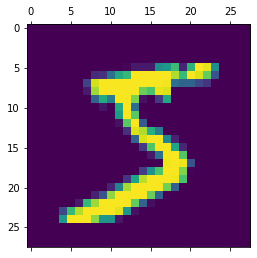

In [10]:
plt.matshow(X_train[0])

In [11]:
y_train[0]

5

In [12]:
# Scale the data by dividing it from 255

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # Convert 2D layer to 1D
    keras.layers.Dense(100,activation='relu'),#Hidden Layer
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2824 - accuracy: 0.9182
Epoch 2/15
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1258 - accuracy: 0.9628
Epoch 3/15
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0905 - accuracy: 0.9727
Epoch 4/15
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0676 - accuracy: 0.9791
Epoch 5/15
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0571 - accuracy: 0.9820
Epoch 6/15
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0471 - accuracy: 0.9845
Epoch 7/15
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0399 - accuracy: 0.9870
Epoch 8/15
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0337 - accuracy: 0.9890s - loss: 0.0325 
Epoch 9/15
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0274 - accuracy: 0.99

In [36]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.1121 - accuracy: 0.9743


[0.11212490298832199, 0.9743]

In [37]:
y_predict = model.predict(X_test)

In [38]:
y_predict[0]

array([1.0785430e-15, 3.0914472e-11, 9.9971411e-12, 1.7839982e-05,
       8.1950031e-20, 1.7045865e-09, 1.2011986e-21, 1.2765712e-01,
       3.9668727e-10, 2.3779319e-09], dtype=float32)

In [39]:
y_predict_value = [np.argmax(i) for i in y_predict]

In [40]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_value)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    1,    1,    0,    1,    1,    4,    0,    2,    0],
       [   0, 1121,    4,    0,    0,    0,    2,    0,    8,    0],
       [   1,    1, 1014,    1,    1,    0,    3,    3,    7,    1],
       [   1,    0,    4,  968,    1,   20,    0,    4,   12,    0],
       [   0,    1,    1,    0,  959,    1,    7,    3,    4,    6],
       [   2,    1,    0,    4,    3,  872,    3,    1,    5,    1],
       [   2,    2,    3,    1,    4,    7,  939,    0,    0,    0],
       [   3,    3,   11,    3,    0,    0,    0,  997,    5,    6],
       [   1,    0,    5,    4,    1,    5,    3,    3,  951,    1],
       [   3,    5,    2,    6,   12,    4,    2,    7,   16,  952]])>

Text(78.0, 0.5, 'Truth')

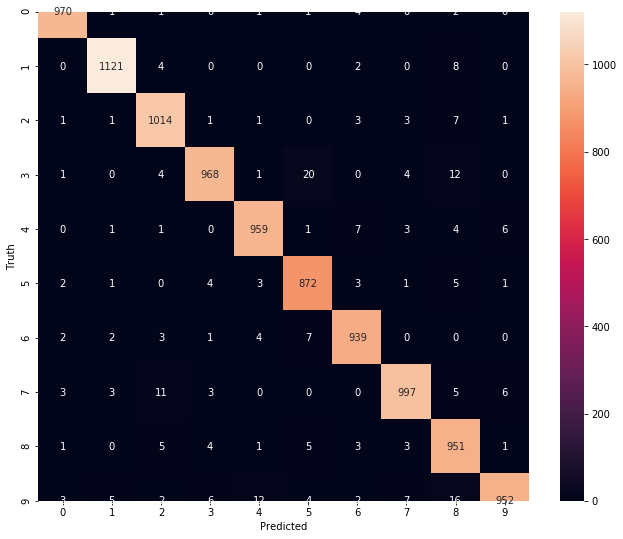

In [41]:
import seaborn as sns
plt.figure(figsize=(11,9))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')